# Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('white')

In [4]:
%matplotlib inline

# Importing dataset

In [5]:
df=pd.read_csv("Baseball.txt",delimiter='\s+', index_col=False)

In [6]:
df.head()

,firstname,lastname,age,team,games,at_bats,runs,hits,doubles,triples,homeruns,RBIs,walks,strikeouts,bat_ave,on_base_pct,slugging_pct,stolen_bases,caught_stealing
0,Alfonso,Soriano,24,NYY,156,696,128,209,51,2,39,102,23,157,0.300,0.332,0.547,41,13
1,Miguel,Tejada,26,OAK,162,662,108,204,30,0,34,131,38,84,0.308,0.354,0.508,7,2
2,*Ichiro,Suzuki,28,SEA,157,647,111,208,27,8,8,51,68,62,0.321,0.388,0.425,31,15
3,Derek,Jeter,28,NYY,157,644,124,191,26,0,18,75,73,114,0.297,0.373,0.421,32,3
4,*Garret,Anderson,30,ANA,158,638,93,195,56,3,29,123,30,80,0.306,0.332,0.539,6,4


**As name are not in proper format, so modifing first name**

In [7]:
#import regularExpression Library
import re

In [8]:
df['firstname'] = df['firstname'].map(lambda x: re.sub(r'\W+', '', x))

droping null values

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,firstname,lastname,age,team,games,at_bats,runs,hits,doubles,triples,homeruns,RBIs,walks,strikeouts,bat_ave,on_base_pct,slugging_pct,stolen_bases,caught_stealing
0,Alfonso,Soriano,24,NYY,156,696,128,209,51,2,39,102,23,157,0.300,0.332,0.547,41,13
1,Miguel,Tejada,26,OAK,162,662,108,204,30,0,34,131,38,84,0.308,0.354,0.508,7,2
2,Ichiro,Suzuki,28,SEA,157,647,111,208,27,8,8,51,68,62,0.321,0.388,0.425,31,15
3,Derek,Jeter,28,NYY,157,644,124,191,26,0,18,75,73,114,0.297,0.373,0.421,32,3
4,Garret,Anderson,30,ANA,158,638,93,195,56,3,29,123,30,80,0.306,0.332,0.539,6,4


**Scatter plot of Homeruns Vs Batting average**

Text(0, 0.5, 'batting average')

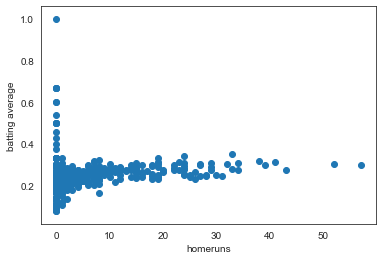

In [11]:
plt.scatter(x=df['homeruns'],y=df['bat_ave'])
plt.xlabel("homeruns")
plt.ylabel("batting average")

finding the relationship between variables

In [15]:
print(df.corr())

                      age     games   at_bats      runs      hits   doubles  \
age              1.000000  0.168663  0.135811  0.109489  0.124400  0.121065   
games            0.168663  1.000000  0.978098  0.933134  0.957060  0.915312   
at_bats          0.135811  0.978098  1.000000  0.960795  0.988312  0.944611   
runs             0.109489  0.933134  0.960795  1.000000  0.970765  0.926706   
hits             0.124400  0.957060  0.988312  0.970765  1.000000  0.952266   
doubles          0.121065  0.915312  0.944611  0.926706  0.952266  1.000000   
triples         -0.029373  0.600462  0.618892  0.602933  0.610929  0.590965   
homeruns         0.103839  0.777050  0.805697  0.858720  0.820683  0.801372   
RBIs             0.135010  0.900033  0.926604  0.935911  0.938827  0.914569   
walks            0.228914  0.830118  0.828207  0.866749  0.819018  0.782140   
strikeouts       0.098688  0.885486  0.886069  0.861007  0.853098  0.841201   
bat_ave          0.071556  0.030684  0.064032  0.101

In [17]:
from numpy import cov
from scipy.stats import pearsonr
arr=list(df.columns)
print("Column Names are------>",arr)
print("\n\n")
trr=[0,1,3]
for i in range(0,len(df.columns)):
    if((i in trr)==False):
        for j in range(0,len(df.columns)):
            if((j in trr)==False):
                corr, _ = pearsonr(df[arr[i]],df[arr[j]])
                if(corr>.5 and arr[i]!=arr[j]):
                    print('The',end=" ")
                    print('Pearsons correlation is: %.3f' % corr,end=" ")
                    print(" between "+arr[i]+" and "+arr[j]+" and they are highly correalted with each other.")
                    print("")

Column Names are------> ['firstname', 'lastname', 'age', 'team', 'games', 'at_bats', 'runs', 'hits', 'doubles', 'triples', 'homeruns', 'RBIs', 'walks', 'strikeouts', 'bat_ave', 'on_base_pct', 'slugging_pct', 'stolen_bases', 'caught_stealing']



The Pearsons correlation is: 0.978  between games and at_bats and they are highly correalted with each other.

The Pearsons correlation is: 0.933  between games and runs and they are highly correalted with each other.

The Pearsons correlation is: 0.957  between games and hits and they are highly correalted with each other.

The Pearsons correlation is: 0.915  between games and doubles and they are highly correalted with each other.

The Pearsons correlation is: 0.600  between games and triples and they are highly correalted with each other.

The Pearsons correlation is: 0.777  between games and homeruns and they are highly correalted with each other.

The Pearsons correlation is: 0.900  between games and RBIs and they are highly correalted wit

**variability of the number of home runs**

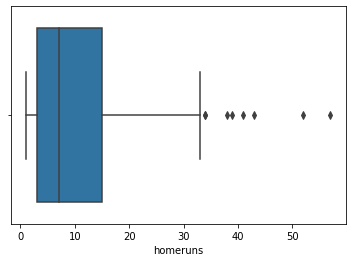

In [17]:
sns.boxplot(df[df['homeruns']>df['bat_ave'].mean()]['homeruns'])

**variability of the number of batting average**

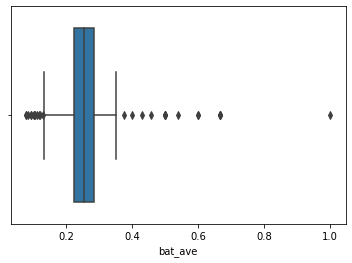

In [18]:
sns.boxplot(df['bat_ave'])

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



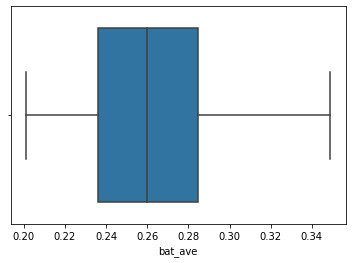

In [19]:
sns.boxplot(df[df['bat_ave']<0.375][df['bat_ave']>0.2]['bat_ave'])

# Making a model with given Data Set

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X=np.array(df[df['bat_ave']<0.375][df['bat_ave']>0.2]['bat_ave']).reshape(-1, 1)
y=np.array(df[df['bat_ave']<0.375][df['bat_ave']>0.2]['homeruns']).reshape(-1, 1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [20]:
lm=LinearRegression()

In [21]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(lm.score(X,y)*100)

9.529230137695789


In [24]:
#predicting home runs from linear regression
y_pred=lm.predict(X)

In [26]:
dfy=pd.DataFrame(y_pred,columns=['Y_predicted'])

In [27]:
dfy['Y']=y

In [28]:
dfy["X"]=X

In [29]:
def checking(r):
    r=round(r)
    if(r==0):
        return "Fitted value"
    else:
        return "Residual value"

In [30]:
dfy['Nature']=dfy['Y']-dfy['Y_predicted']

In [31]:
dfy['Status']=dfy['Nature'].apply(checking)

In [32]:
dfy.head()

,Y_predicted,Y,X,Nature,Status
0,13.158014,39,0.300,25.841986,Residual value
1,13.949383,34,0.308,20.050617,Residual value
2,15.235358,8,0.321,-7.235358,Residual value
3,12.861250,18,0.297,5.138750,Residual value
4,13.751541,29,0.306,15.248459,Residual value


**plot of the residuals versus the fitted values**

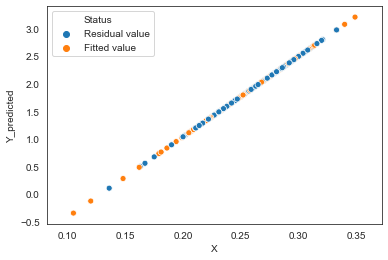

In [86]:
sns.scatterplot(x=dfy['X'],y=dfy['Y_predicted'],hue=dfy['Status'])

**As the accruracy was not good from above model, so taking natural log of home runs, and again fitting the values to the regression line**

In [33]:
X=np.array(df[df['homeruns']!=0]['bat_ave']).reshape(-1,1)
y=np.log(np.array(df[df['homeruns']!=0]['homeruns'])).reshape(-1,1)

In [34]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(lm.score(X,y)*100)

25.411625388819115


In [81]:
dfy.head()

,Y_predicted,X,Y,Nature,Status
0,2.494522,0.300,3.663562,1.169040,Residual value
1,2.611219,0.308,3.526361,0.915142,Residual value
2,2.800851,0.321,2.079442,-0.721410,Residual value
3,2.450761,0.297,2.890372,0.439611,Fitted value
4,2.582045,0.306,3.367296,0.785251,Residual value


In [69]:
y_pred=lm.predict(X)

In [70]:
dfy=pd.DataFrame(y_pred,columns=['Y_predicted'])

In [73]:
dfy["X"]=X
dfy["Y"]=y

In [78]:
def checking(r):
    r=round(r)
    if(r==0):
        return "Fitted value"
    else:
        return "Residual value"

In [79]:
dfy['Nature']=dfy['Y']-dfy['Y_predicted']

In [80]:
dfy['Status']=dfy['Nature'].apply(checking)

**plot of the residuals versus the fitted values**

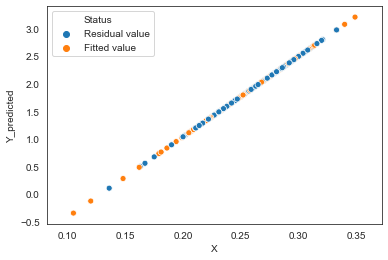

In [82]:
sns.scatterplot(x=dfy['X'],y=dfy['Y_predicted'],hue=dfy['Status'])

In [28]:
b=lm.coef_
a=lm.intercept_
#Linear Regression equation
print("y = {}x + {}".format(round(b[0][0],2),round(a[0],2)))

y = 14.59x + -1.88


In [29]:
print('The value of the y-intercept b0 is',round(a[0],3))

The value of the y-intercept b0 is -1.882


In [30]:
print('The value of the slope b1 is ', round(b[0][0],3))

The value of the slope b1 is  14.587


**Estimating the number of home runs (not in home runs) for a player with a batting average of 0.300**

In [36]:
prediction=lm.predict(np.array(df[df['bat_ave']==.300]['bat_ave']).reshape(-1,1))
prediction_dataframe=pd.DataFrame(prediction,columns=['Estimated Home runs'],index=df[df['bat_ave']==.300]['firstname'])

In [37]:
prediction_dataframe

,Estimated Home runs
firstname,
Alfonso,2.494522
Alex,2.494522
Jacque,2.494522
John,2.494522
AJ,2.494522
Orland,2.494522


In [38]:
#adding some more column for further analysis
prediction_dataframe['Actual home runs']=pd.DataFrame(np.array(df[df['bat_ave']==.300]['homeruns']),columns=['Actual home runs'],index=df[df['bat_ave']==.300]['firstname'])


In [39]:
prediction_dataframe['typical error']=prediction_dataframe['Actual home runs']-prediction_dataframe['Estimated Home runs']

In [40]:
prediction_dataframe

,Estimated Home runs,Actual home runs,typical error
firstname,,,
Alfonso,2.494522,39,36.505478
Alex,2.494522,57,54.505478
Jacque,2.494522,27,24.505478
John,2.494522,22,19.505478
AJ,2.494522,6,3.505478
Orland,2.494522,0,-2.494522


In [41]:
prediction_overall=pd.DataFrame(lm.predict(np.array(df['bat_ave']).reshape(-1,1)),columns=['Estimated Homeruns'],index=df['firstname'])

In [42]:
prediction_overall.head()

,Estimated Homeruns
firstname,
Alfonso,2.494522
Miguel,2.611219
Ichiro,2.800851
Derek,2.450761
Garret,2.582045


In [43]:
prediction_overall['Actual homeruns']=pd.DataFrame(np.array(df['homeruns']),columns=['Actual home runs'],index=df['firstname'])

**size of the typical error in predicting the number of home runs, based on the player's batting average**

In [134]:
prediction_overall.head()

,Estimated Homeruns,Actual homeruns
firstname,,
Alfonso,2.494522,39
Miguel,2.611219,34
Ichiro,2.800851,8
Derek,2.450761,18
Garret,2.582045,29


In [44]:
prediction_overall['Typical Error']=((prediction_overall['Actual homeruns']-prediction_overall['Estimated Homeruns'])/prediction_overall['Actual homeruns'])*100

In [45]:
prediction_overall.head()

,Estimated Homeruns,Actual homeruns,Typical Error
firstname,,,
Alfonso,2.494522,39,93.603789
Miguel,2.611219,34,92.319944
Ichiro,2.800851,8,64.989359
Derek,2.450761,18,86.384662
Garret,2.582045,29,91.096397


**Performing the hypothesis test for determining whether a linear relationship exists between the variables**

In [46]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
stat, p, dof, expected = chi2_contingency(df.drop(['firstname','lastname','team'],axis=1))
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print("----------------------------------------------")
print("chi-square test ==>")
if abs(stat) >= critical:
	print('Dependent (reject H0)---->a linear relationship exists between the variables.')
else:
	print('Independent (fail to reject H0)---->a linear relationship doesn\'t exist between the variables.')
print("----------------------------------------------")
print("interpret p-value===> ", end=" ")
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)----->a linear relationship exists between the variables.')
else:
	print('Independent (fail to reject H0)---->a linear relationship doesn\'t exist between the variables.')
print("----------------------------------------------")

----------------------------------------------
chi-square test ==>
Dependent (reject H0)---->a linear relationship exists between the variables.
----------------------------------------------
interpret p-value===>  significance=0.050, p=0.000
Dependent (reject H0)----->a linear relationship exists between the variables.
----------------------------------------------


**Calculating the correlation coefficient**

In [47]:
np.corrcoef(df['bat_ave'],df['homeruns'])[0, 1]

0.10125662540452778

**Constructing 95% confidence interval for the mean number of home runs for all players who had a batting average of 0.300**

In [48]:
from scipy import stats

In [49]:
r, p = stats.pearsonr(df['bat_ave'],df['homeruns'])
r,p

(0.10125662540452787, 0.0657733200170717)

In [50]:
r_z = np.arctanh(r)
r_z

0.10160482814088584

The corresponding standard deviation is 
s
e
=
1
√
N
−
3
:

In [51]:
se = 1/np.sqrt(df['bat_ave'].size-3)
se

0.05521576303742327

In [52]:
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
lo_z, hi_z = r_z-z*se, r_z+z*se
lo_z, hi_z

(-0.00661607879136171, 0.2098257350731334)

In [53]:
lo, hi = np.tanh((lo_z, hi_z))
lo, hi

(-0.006615982258952076, 0.2067996934492192)

**Constructing a 95% confidence interval for a randomly chosen player with a 0.300 batting average**

In [54]:
import statistics

In [55]:
populationStdev=statistics.stdev(df['bat_ave'])

In [56]:
meanvalue=0.300-(populationStdev*z)

In [57]:
meanvalue

0.12065743922615205

In [58]:
lm.predict(np.array(meanvalue).reshape(1, -1))

array([[-0.12156665]])

# Outliers-->

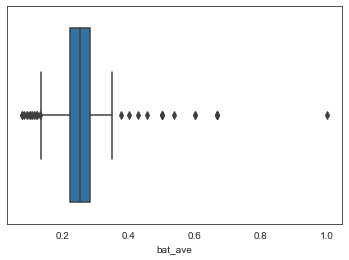

In [124]:
sns.boxplot(df['bat_ave'])

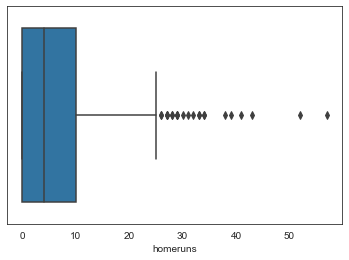

In [125]:
sns.boxplot(df['homeruns'])